# Step 1 Scan mediator mass


In this step we'll generate three samples scanning mediator masses of 125, 250, and 500 GeV. We'll keep the other parameters (dark meson mass, temperature, and decay mode constant.  



## Generating samples

To generate a sample run the command   
  
./suep_main mMed mDark temp decaycard outputfilename randomseed  

Where
* mMed: mass of heavy scalar  
* mDark: mass of dark mesons  
* temp: Temperature parameter  
* decaycard: filename of the decay card  
* outputfilename: filename where events will be written  
* randomseed: an integer, specifying the random seed  

This will produce 1k pp events at 13 TeV

In [1]:
# basic commands
# !./suep_main 125.0 1.0 1.0  decay_example.cmnd mMed-125_mDark-1.0_temp-1.0_decay-generic.hepmc 1
# !./suep_main 250.0 1.0 1.0  decay_example.cmnd mMed-250_mDark-1.0_temp-1.0_decay-generic.hepmc 1
# !./suep_main 500.0 1.0 1.0  decay_example.cmnd mMed-500_mDark-1.0_temp-1.0_decay-generic.hepmc 1

## Read HEPMC files & make plots

Some basic functions to process the output HEPMC files and produce histograms live in plot_hep_mc.py  

Uses a SUEP class structure  
* processEvents() loops over the HEPMC file and fills lists of variables that can be used for plotting   
* doTest() runs a test with processEvents for a single event and prints out useful information  
* basicPlots() outputs a few helpful distributions: number of charged particles, tracks in acceptance, and isotropy 
* eventDisplay(event) makes a very simple event display

Some configurable options and default values
* verbose = False
* maxEvents = 100  
* trackPtCut = 0.7   
* maxEtaCut = 2.5  

Information that's currently being saved for plotting
* scalarPt  
* scalarEta 
* scalarPhi 
* scalarM   
* nCharged  # number of charged status=1 particles
* chargedPt
* nTracks  # number of charged status=1 particles in tracking acceptance
* trackPt  
* trackEta 
* trackPhi 
* trackM   
* isotropy 
* ht  

First we'll setup the SUEP instances and run a test. Then we'll loop over events from the sample sample, make some basic plots, and compare distributions for different mediator masses. 
 

In [2]:
# import SUEP class
from plot_hep_mc import SUEP

In [3]:
# setup instances of SUEP class
suep125 = SUEP("mMed-125_mDark-1.0_temp-1.0_decay-generic.hepmc")
suep250 = SUEP("mMed-250_mDark-1.0_temp-1.0_decay-generic.hepmc")
suep500 = SUEP("mMed-500_mDark-1.0_temp-1.0_decay-generic.hepmc")

In [4]:
# run a test 
suep125.doTest() # process 1 event w/ printout

Processing mMed-125_mDark-1.0_temp-1.0_decay-generic.hepmc
Event 0
scalar: PtEtaPhiM[23.1,2.58,-2.72,125.0]
Some final state charged particles: 
pdgID -211 : PtEtaPhiM[0.8,-0.86,0.68,0.1]
pdgID -211 : PtEtaPhiM[1.6,4.99,2.00,0.1]
pdgID -321 : PtEtaPhiM[1.1,6.19,1.35,0.5]
pdgID -321 : PtEtaPhiM[1.1,1.95,0.05,0.5]
pdgID 211 : PtEtaPhiM[2.9,1.64,0.37,0.1]
pdgID -211 : PtEtaPhiM[1.1,-3.04,0.09,0.1]
pdgID 321 : PtEtaPhiM[1.3,-5.32,-0.82,0.5]
pdgID 2212 : PtEtaPhiM[0.8,-8.45,1.55,0.9]
pdgID -2212 : PtEtaPhiM[1.2,-1.50,0.94,0.9]
pdgID 2212 : PtEtaPhiM[3.8,-0.99,0.69,0.9]
pdgID 211 : PtEtaPhiM[1.3,-1.30,0.12,0.1]
pdgID -2212 : PtEtaPhiM[3.3,-1.31,0.80,0.9]
pdgID 211 : PtEtaPhiM[0.9,3.40,-1.14,0.1]
pdgID 321 : PtEtaPhiM[0.8,7.89,3.04,0.5]
pdgID 211 : PtEtaPhiM[0.8,5.88,2.45,0.1]
pdgID 211 : PtEtaPhiM[0.7,7.01,-0.80,0.1]
Number of status=1 particles: 258
Number of charged particles: 126
Number of truth tracks: 40
Isotropy: 0.58
HT: 71.0


Now we'll process all three samples so we can fill histograms. 

In [5]:
# Run looper
suep125.processEvents()
suep250.processEvents()
suep500.processEvents()

Processing mMed-125_mDark-1.0_temp-1.0_decay-generic.hepmc
Processing mMed-250_mDark-1.0_temp-1.0_decay-generic.hepmc
Processing mMed-500_mDark-1.0_temp-1.0_decay-generic.hepmc


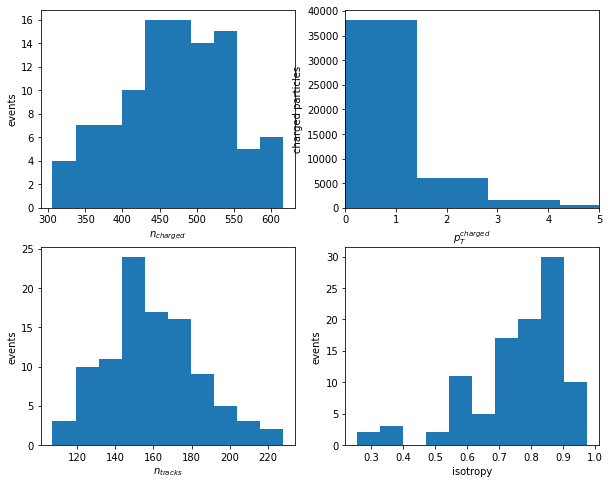

In [6]:
# check the basic output looks ok
suep500.basicPlots()

Text(0.5, 0, '$isotropy$')

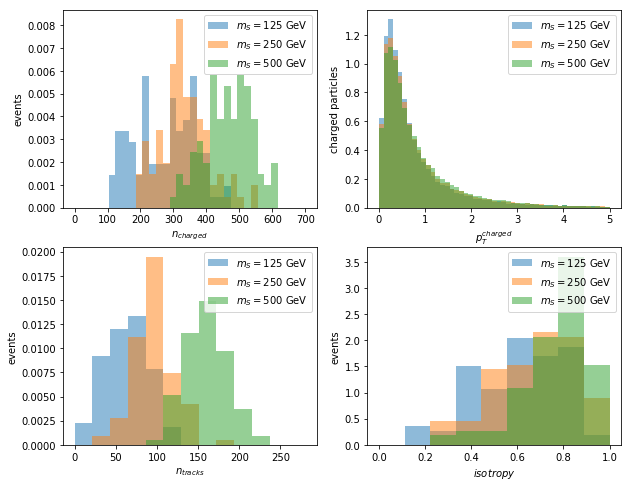

In [18]:
# now let's make some comparison plots
import matplotlib.pyplot as plt
import numpy as np

# 
fig, axs = plt.subplots(2,2,sharey=False,figsize=(10,8))

# nCharged particles
bins = np.linspace(0,700,35)
axs[0,0].hist(suep125.nCharged, bins, alpha=0.5, label='$m_{S}=125$ GeV', normed=1)
axs[0,0].hist(suep250.nCharged, bins, alpha=0.5, label='$m_{S}=250$ GeV', normed=1)
axs[0,0].hist(suep500.nCharged, bins, alpha=0.5, label='$m_{S}=500$ GeV', normed=1)
axs[0,0].legend(loc='upper right')
axs[0,0].set_ylabel("events")
axs[0,0].set_xlabel("$n_{charged}$")

# charged particle pT
# the pT spectra should be the same if dark meson mass and temperature are constant, regardless of mediator mass
bins = np.linspace(0,5,50)
axs[0,1].hist(suep125.chargedPt, bins, alpha=0.5, label='$m_{S}=125$ GeV', normed=1)
axs[0,1].hist(suep250.chargedPt, bins, alpha=0.5, label='$m_{S}=250$ GeV', normed=1)
axs[0,1].hist(suep500.chargedPt, bins, alpha=0.5, label='$m_{S}=500$ GeV', normed=1)
axs[0,1].legend(loc='upper right')
axs[0,1].set_ylabel("charged particles")
axs[0,1].set_xlabel("$p_{T}^{charged}$")

# nTracks with pT > 0.7 GeV
bins = np.linspace(0,280,14)
axs[1,0].hist(suep125.nTracks, bins, alpha=0.5, label='$m_{S}=125$ GeV', normed=1)
axs[1,0].hist(suep250.nTracks, bins, alpha=0.5, label='$m_{S}=250$ GeV', normed=1)
axs[1,0].hist(suep500.nTracks, bins, alpha=0.5, label='$m_{S}=500$ GeV', normed=1)
axs[1,0].legend(loc='upper right')
axs[1,0].set_ylabel("events")
axs[1,0].set_xlabel("$n_{tracks}$")

# isotropy from tracks in acceptance
bins = np.linspace(0,1,10)
axs[1,1].hist(suep125.isotropy, bins, alpha=0.5, label='$m_{S}=125$ GeV', normed=1)
axs[1,1].hist(suep250.isotropy, bins, alpha=0.5, label='$m_{S}=250$ GeV', normed=1)
axs[1,1].hist(suep500.isotropy, bins, alpha=0.5, label='$m_{S}=500$ GeV', normed=1)
axs[1,1].legend(loc='upper right')
axs[1,1].set_ylabel("events")
axs[1,1].set_xlabel("$isotropy$")

Event: 38
HT = 795.2
isotropy = 0.26


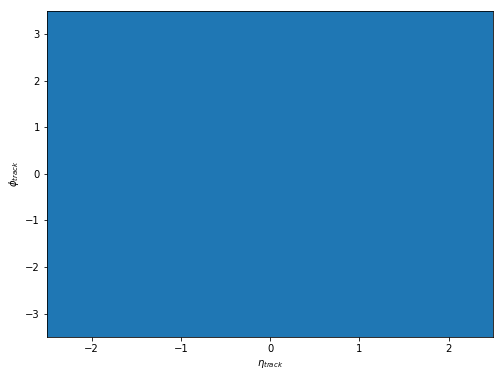

Event: 35
HT = 171.0
isotropy = 0.71


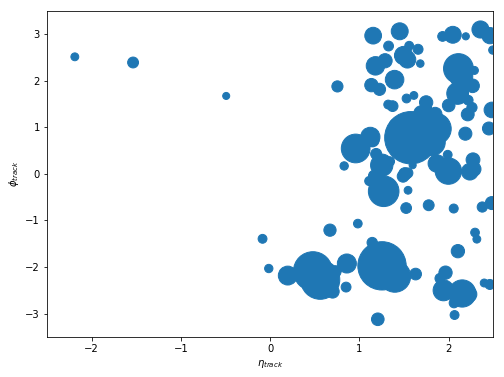

In [8]:
# find a low HT and a high HT event
suep = suep200
max_ht = max(suep.ht)
min_ht = min(suep.ht)

evt_high = suep.ht.index(max_ht)
evt_low  = suep.ht.index(min_ht)

# compare event displays
suep.eventDisplay(evt_high)
suep.eventDisplay(evt_low)


# Step 2: Scan temperature


In [9]:
# Keep masses fixed, and just change temperature
# already generated T=1.0
# !./suep_main 125.0 1.0 0.5  decay_example.cmnd mMed-125_mDark-1.0_temp-0.5_decay-generic.hepmc 1
# !./suep_main 125.0 1.0 2.0  decay_example.cmnd mMed-125_mDark-1.0_temp-2.0_decay-generic.hepmc 1

In [10]:
# setup instances of SUEP class
suep125_temp05 = SUEP("mMed-125_mDark-1.0_temp-0.5_decay-generic.hepmc")
suep125_temp20 = SUEP("mMed-125_mDark-1.0_temp-2.0_decay-generic.hepmc")

In [11]:
# process events
suep125_temp05.processEvents()
suep125_temp20.processEvents()
suep125_temp10 = suep125

Processing mMed-125_mDark-1.0_temp-0.5_decay-generic.hepmc
Processing mMed-125_mDark-1.0_temp-2.0_decay-generic.hepmc


Text(0.5, 0, '$isotropy$')

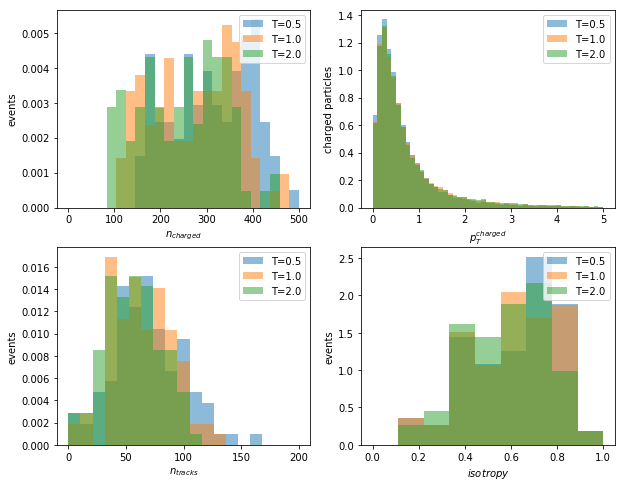

In [12]:
# now let's make more comparison plots
import matplotlib.pyplot as plt
import numpy as np

# overlaying this time
fig, axs = plt.subplots(2,2,sharey=False,figsize=(10,8))

# nCharged particles
bins = np.linspace(0,500,25)
axs[0,0].hist(suep125_temp05.nCharged, bins, alpha=0.5, label='T=0.5', normed=1)
axs[0,0].hist(suep125_temp10.nCharged, bins, alpha=0.5, label='T=1.0', normed=1)
axs[0,0].hist(suep125_temp20.nCharged, bins, alpha=0.5, label='T=2.0', normed=1)
axs[0,0].legend(loc='upper right')
axs[0,0].set_ylabel("events")
axs[0,0].set_xlabel("$n_{charged}$")

# charged particle pT
bins = np.linspace(0,5,50)
axs[0,1].hist(suep125_temp05.chargedPt, bins, alpha=0.5, label='T=0.5', normed=1)
axs[0,1].hist(suep125_temp10.chargedPt, bins, alpha=0.5, label='T=1.0', normed=1)
axs[0,1].hist(suep125_temp20.chargedPt, bins, alpha=0.5, label='T=2.0', normed=1)
axs[0,1].legend(loc='upper right')
axs[0,1].set_ylabel("charged particles")
axs[0,1].set_xlabel("$p_{T}^{charged}$")

# nTracks with pT > 0.7 GeV
bins = np.linspace(0,200,20)
axs[1,0].hist(suep125_temp05.nTracks, bins, alpha=0.5, label='T=0.5', normed=1)
axs[1,0].hist(suep125_temp10.nTracks, bins, alpha=0.5, label='T=1.0', normed=1)
axs[1,0].hist(suep125_temp20.nTracks, bins, alpha=0.5, label='T=2.0', normed=1)
axs[1,0].legend(loc='upper right')
axs[1,0].set_ylabel("events")
axs[1,0].set_xlabel("$n_{tracks}$")

# isotropy from tracks in acceptance
bins = np.linspace(0,1,10)
axs[1,1].hist(suep125_temp05.isotropy, bins, alpha=0.5, label='T=0.5', normed=1)
axs[1,1].hist(suep125_temp10.isotropy, bins, alpha=0.5, label='T=1.0', normed=1)
axs[1,1].hist(suep125_temp20.isotropy, bins, alpha=0.5, label='T=2.0', normed=1)
axs[1,1].legend(loc='upper right')
axs[1,1].set_ylabel("events")
axs[1,1].set_xlabel("$isotropy$")




# Step 3: Scan decay mode

Will compare a few decay modes
* generic: dark meson -> dd-bar
* darkphoHad: dark meson -> A'A', A'-> ee,mumu,pipi with Br(15,15,70), mA' = 0.7 GeV
* darkpho: dark meson -> A'A, A'-> ee,mumu,pipi with Br(40,40,20), mA' = 0.5 GeV
    
Misc note: you need to do your own consistency checks 

Feel free to make your own decay card

In [13]:
# Keep masses and temperature fixed, change decay cards
# !./suep_main 125.0 2.0 1.0  decay_darkphoton_hadronic.cmnd mMed-125_mDark-2.0_temp-1.0_decay-darkPhoHad.hepmc 1
# !./suep_main 125.0 2.0 1.0  decay_darkphoton.cmnd          mMed-125_mDark-2.0_temp-1.0_decay-darkPho.hepmc 1
# !./suep_main 125.0 2.0 1.0  decay_example.cmnd             mMed-125_mDark-2.0_temp-1.0_decay-generic.hepmc 1


In [14]:
# setup instances of SUEP class
suep125_darkPhoHad = SUEP("mMed-125_mDark-2.0_temp-1.0_decay-darkPhoHad.hepmc")
suep125_darkPho    = SUEP("mMed-125_mDark-2.0_temp-1.0_decay-darkPho.hepmc")
suep125_generic    = SUEP("mMed-125_mDark-2.0_temp-1.0_decay-generic.hepmc")

In [15]:
# Compare printouts, hopefully we can tell there's a different in status=1 particle PIDs
suep125_darkPhoHad.doTest()
suep125_darkPho.doTest()
suep125_generic.doTest()

Processing mMed-125_mDark-2.0_temp-1.0_decay-darkPhoHad.hepmc
Event 0
scalar: PtEtaPhiM[23.1,2.58,-2.72,125.0]
Some final state charged particles: 
pdgID -211 : PtEtaPhiM[0.8,-0.86,0.68,0.1]
pdgID -211 : PtEtaPhiM[1.6,4.99,2.00,0.1]
pdgID -321 : PtEtaPhiM[1.1,6.19,1.35,0.5]
pdgID -321 : PtEtaPhiM[1.1,1.95,0.05,0.5]
pdgID 211 : PtEtaPhiM[2.9,1.64,0.37,0.1]
pdgID -211 : PtEtaPhiM[1.1,-3.04,0.09,0.1]
pdgID 321 : PtEtaPhiM[1.3,-5.32,-0.82,0.5]
pdgID 2212 : PtEtaPhiM[0.8,-8.45,1.55,0.9]
pdgID -2212 : PtEtaPhiM[1.2,-1.50,0.94,0.9]
pdgID 2212 : PtEtaPhiM[3.8,-0.99,0.69,0.9]
pdgID 211 : PtEtaPhiM[1.3,-1.30,0.12,0.1]
pdgID -2212 : PtEtaPhiM[3.3,-1.31,0.80,0.9]
pdgID 211 : PtEtaPhiM[0.9,3.40,-1.14,0.1]
pdgID 321 : PtEtaPhiM[0.8,7.89,3.04,0.5]
pdgID 211 : PtEtaPhiM[0.8,5.88,2.45,0.1]
pdgID 211 : PtEtaPhiM[0.7,7.01,-0.80,0.1]
Number of status=1 particles: 249
Number of charged particles: 178
Number of truth tracks: 64
Isotropy: 0.64
HT: 93.5
Processing mMed-125_mDark-2.0_temp-1.0_decay-darkPho.hep

In [16]:
suep125_darkPhoHad.processEvents()
suep125_darkPho.processEvents()
suep125_generic.processEvents()

Processing mMed-125_mDark-2.0_temp-1.0_decay-darkPhoHad.hepmc
Processing mMed-125_mDark-2.0_temp-1.0_decay-darkPho.hepmc
Processing mMed-125_mDark-2.0_temp-1.0_decay-generic.hepmc


Text(0.5, 0, '$isotropy$')

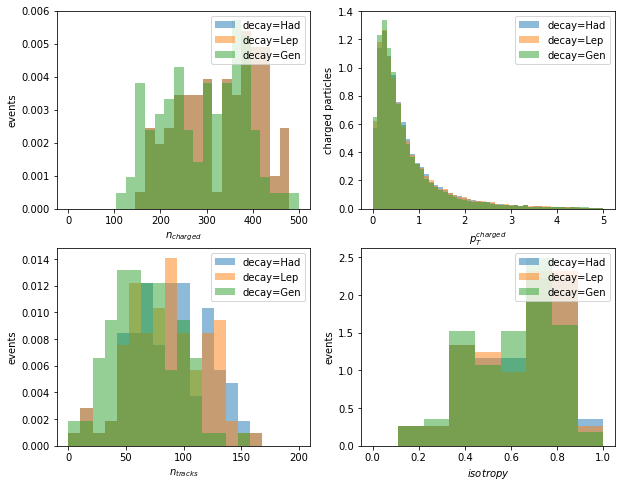

In [17]:
# more comparison plots
fig, axs = plt.subplots(2,2,sharey=False,figsize=(10,8))

# nCharged particles
bins = np.linspace(0,500,25)
axs[0,0].hist(suep125_darkPhoHad.nCharged , bins, alpha=0.5, label='decay=Had', normed=1)
axs[0,0].hist(suep125_darkPho.nCharged    , bins, alpha=0.5, label='decay=Lep', normed=1)
axs[0,0].hist(suep125_generic.nCharged    , bins, alpha=0.5, label='decay=Gen', normed=1)
axs[0,0].legend(loc='upper right')
axs[0,0].set_ylabel("events")
axs[0,0].set_xlabel("$n_{charged}$")

# charged particle pT
bins = np.linspace(0,5,50)
axs[0,1].hist(suep125_darkPhoHad.chargedPt, bins, alpha=0.5, label='decay=Had', normed=1)
axs[0,1].hist(suep125_darkPho.chargedPt   , bins, alpha=0.5, label='decay=Lep', normed=1)
axs[0,1].hist(suep125_generic.chargedPt   , bins, alpha=0.5, label='decay=Gen', normed=1)
axs[0,1].legend(loc='upper right')
axs[0,1].set_ylabel("charged particles")
axs[0,1].set_xlabel("$p_{T}^{charged}$")

# nTracks with pT > 0.7 GeV
bins = np.linspace(0,200,20)
axs[1,0].hist(suep125_darkPhoHad.nTracks, bins, alpha=0.5, label='decay=Had', normed=1)
axs[1,0].hist(suep125_darkPho.nTracks   , bins, alpha=0.5, label='decay=Lep', normed=1)
axs[1,0].hist(suep125_generic.nTracks   , bins, alpha=0.5, label='decay=Gen', normed=1)
axs[1,0].legend(loc='upper right')
axs[1,0].set_ylabel("events")
axs[1,0].set_xlabel("$n_{tracks}$")

# isotropy from tracks in acceptance
bins = np.linspace(0,1,10)
axs[1,1].hist(suep125_darkPhoHad.isotropy, bins, alpha=0.5, label='decay=Had', normed=1)
axs[1,1].hist(suep125_darkPho.isotropy   , bins, alpha=0.5, label='decay=Lep', normed=1)
axs[1,1].hist(suep125_generic.isotropy   , bins, alpha=0.5, label='decay=Gen', normed=1)
axs[1,1].legend(loc='upper right')
axs[1,1].set_ylabel("events")
axs[1,1].set_xlabel("$isotropy$")
